# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar data cleaning and preparation as we did in the FTE. Specifically, at least complete these minimum requirements:

- Check for outliers in numeric data, and deal with them if needed
- Check for missing values, and decide how to deal with them if needed
- Convert categorical columns to numeric values
- Create at least one new feature by combining multiple columns. For example, you could calculate the ratio of total charges to tenure. Create at least one plot for your new feature.
- Save the data to a csv (or another filetype of your choice) for use next week.
- Write a short analysis at the end of the notebook describing your findings and what you did.

You can do more data cleaning, preparation, and EDA beyond these basic requirements if you want to learn more and develop your data science skills. For example, you could use a box-cox transformation on the numeric data or try other outlier methods.

### DS process status

Here is our data science process, and where we are (#3):

**1. Business understanding**

Can we use machine learning to predict if a customer will churn before they leave?

**2. Data understanding**

Done in week 1 (mostly), this is iterative so you might do more of this as we go on.

**3. Data preparation**

We are here this week.


**4. Modeling**

Next week


**5. Evaluation**

Next week


**6. Deployment**

Next week

In [1]:
import pandas as pd

churn_raw = pd.read_csv('./churn_data.csv')

In [2]:
%%markdown
notes
(Information used for this section and decisions is from Week 1 charts and EDA)
### customerID <br>
We can drop this for training the model not going to be useful for predictions <br>


### Average Charge
* Newly created field, total charges / tenure

### tenure
* Weighted to both ends of values
* No NaNs
* 73 distinct values <br>

Might be useful to try to 'bin' this data? ~~0-5, 6-10, etc...~~ I'm going to use qcut to ensure bins are evenly populated
Then convert those into an ordinal categorical column? <br>

### PhoneService
* 2 Distinct values t/f
* No NaNs
* Much more true than false <br>
Turn into binary 0/1 column. <br>

### Contract
* 3 distinct
* No NaNs
* mostly month-2-month, other 2 cats evenish <br>

Onehotencode-1 this one. <br>

### PaymentMethod

* 4 distinct vals
* 3 have pretty even distru, other has a bit more
* No NaNs


Onehotencode-1 this one too.

### MonthlyCharges
* 1585 distinct
* No NaNs
* 18.25 - 118.75 range

I'll probably want to either standardize or normalize this feature.
No outliers and not a gaussian distribution, so I will probably normalize.

### TotalCharges

Shape of the distribution of this data looks like e^-x
so I think the distribution will be normalized if I take the log(1/x) of the data?



### Churn
This is a target, turn it into binary 0/1.

notes
(Information used for this section and decisions is from Week 1 charts and EDA)
### customerID <br>
We can drop this for training the model not going to be useful for predictions <br>


### Average Charge
* Newly created field, total charges / tenure

### tenure
* Weighted to both ends of values
* No NaNs
* 73 distinct values <br>

Might be useful to try to 'bin' this data? ~~0-5, 6-10, etc...~~ I'm going to use qcut to ensure bins are evenly populated
Then convert those into an ordinal categorical column? <br>

### PhoneService
* 2 Distinct values t/f
* No NaNs
* Much more true than false <br>
Turn into binary 0/1 column. <br>

### Contract
* 3 distinct
* No NaNs
* mostly month-2-month, other 2 cats evenish <br>

Onehotencode-1 this one. <br>

### PaymentMethod

* 4 distinct vals
* 3 have pretty even distru, other has a bit more
* No NaNs


Onehotencode-1 this one too.

### MonthlyCharges
* 1585 distinct
* No NaNs
* 18.25 - 118.75 range

I'll probably want to either standardize or normalize this feature.
No outliers and not a gaussian distribution, so I will probably normalize.

### TotalCharges

Shape of the distribution of this data looks like e^-x
so I think the distribution will be normalized if I take the log(1/x) of the data?



### Churn
This is a target, turn it into binary 0/1.


In [3]:
%%markdown
So, in summary:
* customerID    : DROP
* tenure        : Let's try binning this one
* PhoneService  : Binary 0/1
* Contract      : OneHotEncode-1
* PaymentMethod : OneHotEncode-1
* MonthlyCharges: Normalize
* TotalCharges  : Take log of this one I guess. Still debating dropping it bc of high correlation with tenure
* Churn         : Binary 0/1 [target]

So, in summary:
* customerID    : DROP
* tenure        : Let's try binning this one
* PhoneService  : Binary 0/1
* Contract      : OneHotEncode-1
* PaymentMethod : OneHotEncode-1
* MonthlyCharges: Normalize
* TotalCharges  : Take log of this one I guess. Still debating dropping it bc of high correlation with tenure
* Churn         : Binary 0/1 [target]


In [4]:
# Let's initialize a working copy of the dataframe so we don't have to bother reading the CSV again later
churn_wrk = churn_raw

In [5]:
%%markdown
# New column : average charge

# New column : average charge


In [6]:
churn_wrk['average_charge'] = churn_wrk['TotalCharges'] / churn_wrk['tenure']

In [7]:
%%markdown
# customerID : DROP

# customerID : DROP


In [8]:
# Now, why don't we go column by column?

churn_wrk = churn_wrk.drop(['customerID'], axis=1)

In [9]:
%%markdown
# tenure : Create new binned feature

# tenure : Create new binned feature


In [10]:
pd.cut(churn_wrk['tenure'], bins=10).value_counts()

(-0.072, 7.2]    1612
(64.8, 72.0]     1109
(7.2, 14.4]       759
(14.4, 21.6]      570
(21.6, 28.8]      556
(28.8, 36.0]      545
(57.6, 64.8]      501
(50.4, 57.6]      495
(43.2, 50.4]      452
(36.0, 43.2]      444
Name: tenure, dtype: int64

In [11]:
pd.qcut(churn_wrk['tenure'], q=10).value_counts()

(-0.001, 2.0]    862
(60.0, 69.0]     756
(29.0, 40.0]     717
(6.0, 12.0]      705
(50.0, 60.0]     698
(12.0, 20.0]     692
(20.0, 29.0]     691
(40.0, 50.0]     652
(69.0, 72.0]     651
(2.0, 6.0]       619
Name: tenure, dtype: int64

In [12]:
# I think I'm going to use qcut because it looks like cut will be skewed to 2 of the bins
churn_wrk['tenure_bins'] = pd.qcut(churn_wrk['tenure'], q=10, labels=[i for i in range(0,10)])
churn_wrk = churn_wrk.drop(['tenure'], axis=1)

In [13]:
%%markdown
# PhoneService  : Binary 0/1

# PhoneService  : Binary 0/1


In [14]:
# Get our binary column
phoneservice_binary = pd.get_dummies(churn_wrk['PhoneService'], drop_first=True, prefix='PhoneService')

# Concatenate it with our dataframe
churn_wrk = pd.concat([churn_wrk, phoneservice_binary], axis=1)

# and now drop the column that's been processed
churn_wrk = churn_wrk.drop(['PhoneService'], axis=1)

In [15]:
%%markdown
# Contract : OneHotEncode-1

# Contract : OneHotEncode-1


In [16]:
# get our dummy columns
contract_dummies = pd.get_dummies(churn_wrk['Contract'], drop_first=True, prefix='Contract')

# Concat them with our dataframe
churn_wrk = pd.concat([churn_wrk, contract_dummies], axis=1)

# and now drop the column
churn_wrk = churn_wrk.drop(['Contract'], axis=1)

# I don't trust "inplace" operations in pandas

In [17]:
%%markdown
# PaymentMethod : OneHotEncode-1

# PaymentMethod : OneHotEncode-1


In [18]:
# get our dummy columns
paymentmethod_dummies = pd.get_dummies(churn_wrk['PaymentMethod'], drop_first=True, prefix='PaymentMethod', columns=[''])

# Concat them with our dataframe
churn_wrk = pd.concat([churn_wrk, paymentmethod_dummies], axis=1)

# and now drop the column
churn_wrk = churn_wrk.drop(['PaymentMethod'], axis=1)

In [19]:
%%markdown
# MonthlyCharges: Normalize

# MonthlyCharges: Normalize


In [20]:
# Create new normalized column
churn_wrk['MonthlyCharges_normal'] = ((churn_wrk['MonthlyCharges'] - churn_wrk['MonthlyCharges'].min()) /
                    (churn_wrk['MonthlyCharges'].max() - churn_wrk['MonthlyCharges'].min()))

# Drop old column
churn_wrk = churn_wrk.drop(['MonthlyCharges'], axis=1)

In [21]:
%%markdown
# TotalCharges : Take log of this one


# TotalCharges : Take log of this one


<AxesSubplot:>

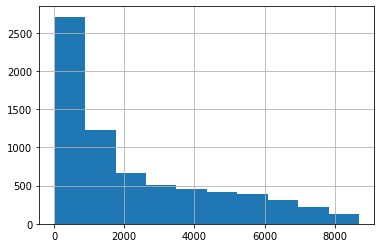

In [22]:
churn_wrk['TotalCharges'].hist()

In [23]:
# I need a function to apply log(1/y) using df.apply
import numpy as np

def log_1_y(x):
    return np.log(1/x)

<AxesSubplot:>

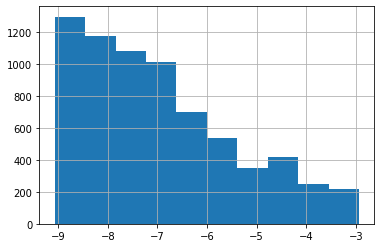

In [24]:

totalcharges_log = churn_wrk['TotalCharges'].apply(log_1_y)
totalcharges_log = totalcharges_log.rename('TotalCharges_log')

totalcharges_log.hist()
# It's slighty better, but still pretty skewed...

In [25]:
churn_wrk = pd.concat([churn_wrk, totalcharges_log], axis=1)
churn_wrk = churn_wrk.drop(['TotalCharges'], axis=1)

In [26]:
%%markdown
# Churn : Binary 0/1 [target]

# Churn : Binary 0/1 [target]


In [27]:
# Get dummy
churn_binary = pd.get_dummies(churn_wrk['Churn'], drop_first=True, prefix='Churn')

#combine
churn_wrk = pd.concat([churn_wrk, churn_binary], axis=1)

#drop
churn_wrk = churn_wrk.drop(['Churn'], axis=1)

In [28]:
churn_wrk.head()

,average_charge,tenure_bins,PhoneService_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges_normal,TotalCharges_log,Churn_Yes
0,29.850000,0,0,0,0,0,1,0,0.115423,-3.396185,0
1,55.573529,5,1,1,0,0,0,1,0.385075,-7.544068,0
2,54.075000,0,1,0,0,0,0,1,0.354229,-4.683519,1
3,40.905556,6,0,1,0,0,0,0,0.239303,-7.517928,0
4,75.825000,0,1,0,0,0,1,0,0.521891,-5.021575,1


In [29]:
%%markdown
# Cleaner Class
I originally used fit_transform to try in sklearn.pipeline but the way it turns my dataframe into a numpy ndarray and loses all my headers makes it too hard to deal with ¯\_(ツ)_/¯

# Cleaner Class
I originally used fit_transform to try in sklearn.pipeline but the way it turns my dataframe into a numpy ndarray and loses all my headers makes it too hard to deal with ¯\_(ツ)_/¯


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
# I hate having to rerun multiple cells though, so
class InitAttributeCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
            return self # Nothing to do here, apparently
    def transform(self, X, y=None):
        ### New column : average charge
        X['average_charge'] = X['TotalCharges'] / X['tenure']
        
        
        ### customerID : DROP
        X = X.drop(['customerID'], axis=1)
        

        ### tenure : bins
        X['tenure_bins'] = pd.qcut(X['tenure'], q=10, labels=[i for i in range(0,10)])
        X = X.drop(['tenure'], axis=1)
        
        
        ### PhoneService : binarize
        # Get our binary column
        phoneservice_binary = pd.get_dummies(X['PhoneService'], drop_first=True, prefix='PhoneService')
        
        # Concatenate it with our dataframe
        X = pd.concat([X, phoneservice_binary], axis=1)
        
        # and now drop the column that's been processed
        X = X.drop(['PhoneService'], axis=1)

        
        ### Contract : onehotencode
        # get our dummy columns
        contract_dummies = pd.get_dummies(X['Contract'], drop_first=True, prefix='Contract')

        # Concat them with our dataframe
        X = pd.concat([X, contract_dummies], axis=1)

        # and now drop the column
        X = X.drop(['Contract'], axis=1)

        
        # PaymentMethod : onehotencode
        # get our dummy columns
        paymentmethod_dummies = pd.get_dummies(X['PaymentMethod'], drop_first=True, prefix='PaymentMethod', columns=[''])

        # Concat them with our dataframe
        X = pd.concat([X, paymentmethod_dummies], axis=1)

        # and now drop the column
        X = X.drop(['PaymentMethod'], axis=1)

        
        ### MonthlyCharges : normalize
        # Create new normalized column
        X['MonthlyCharges_normal'] = ((X['MonthlyCharges'] - X['MonthlyCharges'].min()) /
                            (X['MonthlyCharges'].max() - X['MonthlyCharges'].min()))

        # Drop old column
        X = X.drop(['MonthlyCharges'], axis=1)

            
        ### TotalCharges : apply log
        # Fill TotalCharges with the mode of the dataset because it's so heavily skewed
        X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].mode())
        
        # apply log
        totalcharges_log = X['TotalCharges'].apply(np.log)
        
        # change name before concat
        totalcharges_log = totalcharges_log.rename('TotalCharges_log')
        
        #concat
        X = pd.concat([X, totalcharges_log], axis=1)
        
        #drop old
        X = X.drop(['TotalCharges'], axis=1)
        
        
        ### Churn : binarize
        # Get dummy
        churn_binary = pd.get_dummies(X['Churn'], drop_first=True, prefix='Churn')

        #combine
        X = pd.concat([X, churn_binary], axis=1)

        #drop
        X = X.drop(['Churn'], axis=1)
        return X

In [31]:
# and bam, clean!
cleaner = InitAttributeCleaner()
churn_clean = cleaner.fit_transform(churn_raw)

In [32]:
# and CSV it
churn_clean.to_csv('./churn_clean.csv', index=False)

### Summary

Write your summary of the process and results here.

In [35]:
%%markdown
I didn't actually see any outliers in the data to clean up. Even the data at the "edges" of
the provided range happens fairly frequently. Similarly, there were no missing values in the
provided dataset. How nice is that! 

There were four categorical columns. PhoneService and Churn [the target] were binary 
categories, and I turned both of these into columns containing a 0 (False) or 1 (True) using
pandas.get_dummies. The other two categories, Contract and PaymentMethod, contained multiple
values. I again used pandas.get_dummies, but this time to OneHotEncode the possible values.
Since there is 4 discrete possibilities, I dropped one of the columns of each leaving number
of columns = (N possibilities) - 1.

I dropped column customerID, as I did not see how it could assist a model in predicting
churn.

Tenure has 73 distinct values, which I thought might be difficult for a model to handle. I
created a new column quantizing the data into 10 bins with even samples in each. Values in
this new column (tenure_bins) go 0-9 to imply the ordinal meaning of the original values.

MonthlyCharges has a lot of distinct values that may be difficult for a model to understand,
so I used a minmax normalization to bring the values within the range [0,1].

TotalCharges' distribution had an interesting shape to me that almost looked like e^-x. So, I took the log
of the feature. The distribution is slightly more evenly distributed now, so hopefully it
helps.

I created a new column average_charge to get the average charge paid over time. Curious if
this shows that some people paid a less "fair" rate than others for similar services.



Some of my decisions I am less sure of than others. Using qcut vs. cut when binning my tenure was a hard 
choice, I justified what I chose but still wonder if I made the correct decision. I also wonder if the
correlation between tenure and TotalCharges is going to be an issue. Taking the log of TotalCharges was
a little bit of a gamble based on inuition on the shape of the data... but we'll see how it plays out. 
I may end up giving my cleaner class a hyperparameter to toggle that function to test whether or not it's
helping at all later down the road.

I didn't actually see any outliers in the data to clean up. Even the data at the "edges" of
the provided range happens fairly frequently. Similarly, there were no missing values in the
provided dataset. How nice is that! 

There were four categorical columns. PhoneService and Churn [the target] were binary 
categories, and I turned both of these into columns containing a 0 (False) or 1 (True) using
pandas.get_dummies. The other two categories, Contract and PaymentMethod, contained multiple
values. I again used pandas.get_dummies, but this time to OneHotEncode the possible values.
Since there is 4 discrete possibilities, I dropped one of the columns of each leaving number
of columns = (N possibilities) - 1.

I dropped column customerID, as I did not see how it could assist a model in predicting
churn.

Tenure has 73 distinct values, which I thought might be difficult for a model to handle. I
created a new column quantizing the data into 10 bins with even samples in each. Values in
this new column (tenure_bins) go 0-9 to imply the ordinal meaning of the original values.

MonthlyCharges has a lot of distinct values that may be difficult for a model to understand,
so I used a minmax normalization to bring the values within the range [0,1].

TotalCharges' distribution had an interesting shape to me that almost looked like e^-x. So, I took the log
of the feature. The distribution is slightly more evenly distributed now, so hopefully it
helps.

I created a new column average_charge to get the average charge paid over time. Curious if
this shows that some people paid a less "fair" rate than others for similar services.



Some of my decisions I am less sure of than others. Using qcut vs. cut when binning my tenure was a hard 
choice, I justified what I chose but still wonder if I made the correct decision. I also wonder if the
correlation between tenure and TotalCharges is going to be an issue. Taking the log of TotalCharges was
a little bit of a gamble based on inuition on the shape of the data... but we'll see how it plays out. 
I may end up giving my cleaner class a hyperparameter to toggle that function to test whether or not it's
helping at all later down the road.
